In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/MGV12/Movies_Summary_5K/train.csv")

In [ ]:
df.head()

**Text Cleaning**

Kisbetűsítés

In [ ]:
df['Movie Description'] = df['Movie Description'].str.lower()

Speciális karakterek eltávolítása

In [ ]:
import re

def remove_special_characters(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return text

df['Movie Description'] = df['Movie Description'].apply(remove_special_characters)

Stopword-ök eltávolítása

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['Movie Description'] = df['Movie Description'].apply(remove_stopwords)

Stemming

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

df['Movie Description'] = df['Movie Description'].apply(stem_text)

Tesztelés

In [ ]:
# prompt: Create a python code where you test that the text cleaning was successfull to df["Movie Description"]. Check if the lowering, removing special characters, "directed by", "film", stopwords and the stemming was successful for all descriptions. Show which one failed. Show progress bar

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

# Assuming df is already loaded and processed as in the previous code

# Download necessary NLTK data (if not already downloaded)
nltk.download('stopwords', quiet=True)

# Function to test individual cleaning steps
def test_cleaning(text):
    original_text = text

    # Lowering
    text = text.lower()
    if text != original_text.lower():
      return "Lowering failed", original_text, text

    # Special Characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    if any(c not in "abcdefghijklmnopqrstuvwxyz0123456789 " for c in text):
      return "Special char removal failed", original_text, text

    # Stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = " ".join(filtered_words)
    for word in text.split():
      if word in stop_words:
        return "Stopword removal failed", original_text, text

    # Stemming
    stemmer = PorterStemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    text = " ".join(stemmed_words)

    return "Success", original_text, text

# Test cleaning for each description with a progress bar
failed_tests = []
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Testing cleaning"):
  result, original, cleaned = test_cleaning(row["Movie Description"])
  if result != "Success":
    failed_tests.append((index, result, original, cleaned))

print("\nCleaning tests completed.")

if failed_tests:
  print(f"\n{len(failed_tests)} descriptions failed cleaning tests:")
  for index, result, original, cleaned in failed_tests:
      print(f"Index: {index}, Test: {result}")
      print(f"Original Text:\n{original}\nCleaned Text:\n{cleaned}\n")
else:
  print("\nAll descriptions passed the cleaning tests.")

**Text Cleaning (Title)**

Kisbetűsítés

In [ ]:
# prompt: Create a python code where you lower the df["Movie Title"] column

df['Movie Title Cleaned'] = df['Movie Title'].str.lower()

Évszám, eredeti nyelvű cím kiszedése

In [ ]:
# prompt: Create a python code where you remove from df["Movie Title"] the years and the real title of the movie. Years looks like "(year)" and the real title looks like "(title)"

def clean_movie_title(title):
    # Remove years (e.g., (2000))
    title = re.sub(r'\(\d{4}\)', '', title)
    # Remove real titles (e.g., (title))
    title = re.sub(r'\(.*?\)', '', title)
    # Remove extra whitespace
    title = title.strip()
    return title

df['Movie Title Cleaned'] = df['Movie Title Cleaned'].apply(clean_movie_title)

Speciális karakterek kiszedése

In [ ]:
# prompt: Create a python code where you remove special characters from df["Movie Title Cleaned"]

def remove_special_characters_title(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['Movie Title Cleaned'] = df['Movie Title Cleaned'].apply(remove_special_characters_title)

Szóközök kiszedése

In [ ]:
# prompt: Create a python code where you remove spaces from df["Movie Title Cleaned"]

def remove_spaces(text):
    return text.replace(" ", "")

df['Movie Title Cleaned'] = df['Movie Title Cleaned'].apply(remove_spaces)

Embedding (GloVe)

In [ ]:
import pandas as pd

df_glove = pd.read_parquet("hf://datasets/karmiq/glove/glove.6B.50d.parquet")
glove_dict = df_glove.set_index('word').T.to_dict('list')

In [ ]:
df_glove.head()

Vektorokká alakítás

In [ ]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

def text_to_glove_embedding(text):
    """Convert a text to its GloVe embedding by averaging word vectors."""
    words = text.split()
    word_vectors = [glove_dict[word] for word in words if word in glove_dict]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(50)  # Return a zero vector if no words match

# Use tqdm.pandas() to integrate tqdm with pandas
tqdm.pandas()

# Apply progress_apply to the DataFrame's apply method
df['GloVe Embedding'] = df['Movie Description'].progress_apply(text_to_glove_embedding)

In [ ]:
df.head()

In [ ]:
pip install fuzzywuzzy[speedup]

Ajánlás

Enter a movie title: Harry Potter
The movie was not found. Did you mean one of these?
- Harry Potter and the Deathly Hallows: Part 1 (2010) (Score: 90)
- Harry Potter and the Order of the Phoenix (2007) (Score: 90)
- Harry Potter and the Sorcerer's Stone (2001) (Score: 90)
- Harry Potter and the Chamber of Secrets (2002) (Score: 90)
- Harry Potter and the Deathly Hallows: Part 2 (2011) (Score: 90)
Top 10 recommendations for 'Harry Potter and the Deathly Hallows: Part 1 (2010)':
- Harry Potter and the Prisoner of Azkaban (2004) (Similarity Score: 0.9502)
- Harry Potter and the Chamber of Secrets (2002) (Similarity Score: 0.9418)
- Harry Potter and the Goblet of Fire (2005) (Similarity Score: 0.9405)
- Persuasion (1995) (Similarity Score: 0.9336)
- Four Feathers, The (1939) (Similarity Score: 0.9318)
- Harry Potter and the Deathly Hallows: Part 2 (2011) (Similarity Score: 0.9291)
- X-Men: The Last Stand (2006) (Similarity Score: 0.9276)
- Places in the Heart (1984) (Similarity Score: 0.9

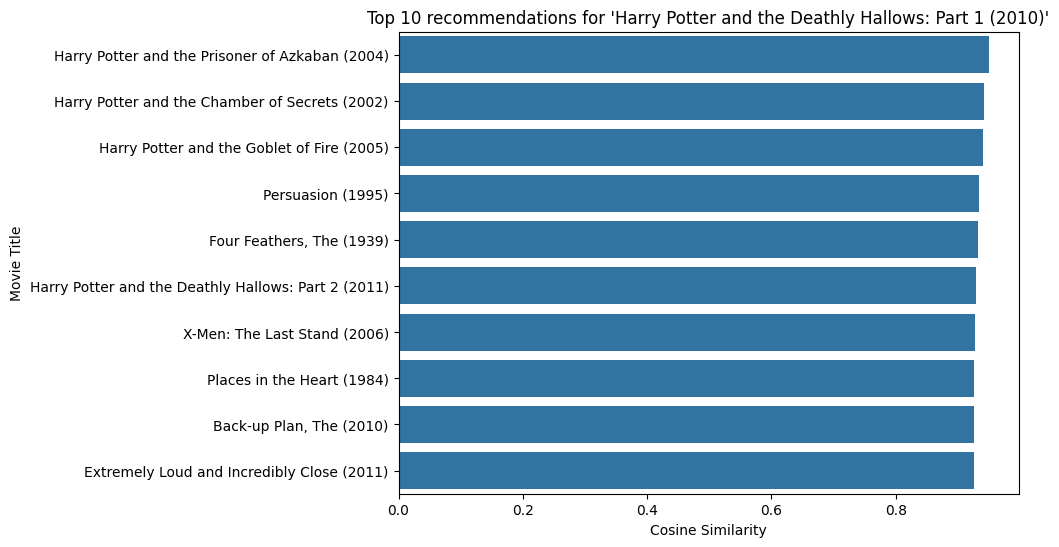

In [ ]:
import pandas as pd
import numpy as np
import re
from fuzzywuzzy import process
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def recommend_movies_glove(movie_title, top_n=10):
    # Preprocess the input movie title
    movie_title_cleaned = movie_title.lower()
    movie_title_cleaned = re.sub(r'\(\d{4}\)', '', movie_title_cleaned)
    movie_title_cleaned = re.sub(r'\(.*?\)', '', movie_title_cleaned)
    movie_title_cleaned = movie_title_cleaned.strip()

    # Fuzzy matching if exact match is not found
    closest_matches = process.extract(movie_title, df['Movie Title'], limit=5)
    exact_match_indices = df.index[df['Movie Title'].str.lower() == movie_title_cleaned.lower()]

    if len(exact_match_indices) > 0:
        movie_index = exact_match_indices[0]
    else:
        print("The movie was not found. Did you mean one of these?")
        for match in closest_matches:
            print(f"- {match[0]} (Score: {match[1]})")
        movie_index = df.index[df['Movie Title'] == closest_matches[0][0]][0]

    # Ensure embeddings are valid NumPy arrays
    df['GloVe Embedding'] = df['GloVe Embedding'].apply(lambda x: np.array(x) if isinstance(x, (list, np.ndarray)) else np.zeros(50))
    embeddings_matrix = np.vstack(df['GloVe Embedding'])  # Combine all embeddings into a 2D array

    # Compute cosine similarity with other movies
    movie_embedding = np.array(df['GloVe Embedding'][movie_index])
    similarity_scores = cosine_similarity(movie_embedding, embeddings_matrix)
    similarity_scores = similarity_scores.flatten()

    # Get top N recommendations (excluding the movie itself)
    related_movie_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]

    # Display recommendations
    print(f"Top {top_n} recommendations for '{df['Movie Title'][movie_index]}':")
    for i in related_movie_indices:
        print(f"- {df['Movie Title'][i]} (Similarity Score: {similarity_scores[i]:.4f})")

    # Visualize the top 10 matches
    top_10_indices = np.argsort(similarity_scores)[::-1][1:11]
    plt.figure(figsize=(8, 6))
    sns.barplot(x=similarity_scores[top_10_indices], y=df['Movie Title'][top_10_indices])
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Movie Title")
    plt.title(f"Top {top_n} recommendations for '{df['Movie Title'][movie_index]}'")
    plt.show()

# Get user input
user_movie_title = input("Enter a movie title: ")

# Recommend movies
recommend_movies_glove(user_movie_title)